In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipympl

In [6]:
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype=torch.double).reshape(-1, 2)
y_train = torch.tensor([1.0, 1.0, 1.0, 0.0], dtype=torch.double).reshape(-1, 1) # opposite of x_train

print(x_train)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], dtype=torch.float64)


In [7]:
class Model:

    def __init__(self):
        #Model variables
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True, dtype=torch.double)
        self.b = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)

    def logits(self, x):
        return x @ self.W + self.b

    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))
    
    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)
    
    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())

In [8]:
model = Model()

#Optimize: adjust W and b to minimize loss using Stochastic Gradient Descent(SGD)
optimizer = torch.optim.SGD([model.W, model.b], 0.1)
for epoch in range(100000):
    model.loss(x_train, y_train).backward() #Compute loss gradients
    optimizer.step() #Optimizes by adjusting W and b
    #similiar to model.W -= model.W.grad * 0.01 (and same for b)

    optimizer.zero_grad() #Clear gradients for next step

torch.Size([25, 25])
torch.Size([25, 25])


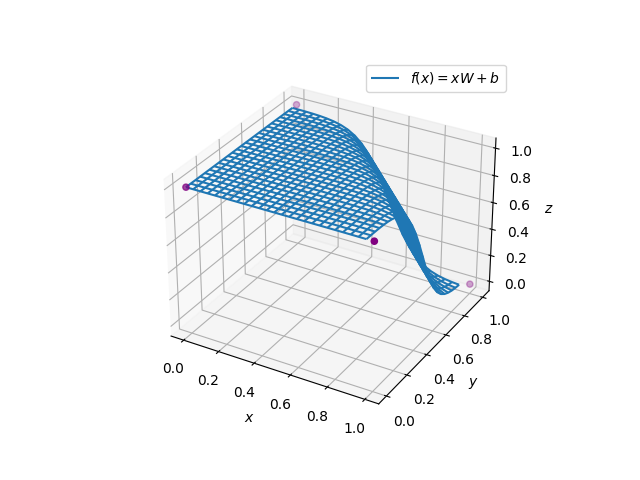

In [65]:
#Visualisering

%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # 3D plots require a subplot with 3D projection enabled

ax.scatter3D(x_train[:,0], x_train[:,1], y_train, color="purple")

x = torch.arange(start=0., end=1., step=0.04)  # Create the vector [0., 0.01, ..., 0.99]
x = x.expand(x.shape[0], -1)  # Create the square matrix [[0., 0.01, ..., 0.99], ..., [0., 0.01, ..., 0.99]]
y = x.T  # Transpose of x: [[0., ..., 0.], [0.01, ..., 0.01], ... [0.99, ..., 0.99]]
print(x.shape)
print(y.shape)
z = model.f(torch.cat(tuple(torch.dstack([x,y]))).double()).reshape(25,25)
#print(z.shape)
ax.plot_wireframe(x, y, z.detach(), label="$f(x) = xW+b$")  # * and + are element-wise operators resulting in a matrix with the same shape as x and y

ax.set_xlabel('$x$')  # $$ activates LaTeX math notation
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.legend()
plt.show()